In [2]:
import numpy as np
import inspect
import ringity as rng
import scipy.stats as ss
import matplotlib.pyplot as plt

In [64]:
rv = ss.expon(scale = 1.2, loc = 0.1)

In [43]:
rv.args

()

In [44]:
rv.a = 0

In [45]:
rv.mean()

1.3

In [51]:
rv.stats(moments = 'mvsk')

(array(1.3), array(1.44), array(2.), array(6.))

In [54]:
ss.__file__

'/Users/dottolab/Documents/my_stuff/ringity_testing/ringity/lib/python3.8/site-packages/scipy/stats/__init__.py'

In [56]:
inspect.getmro(ss._continuous_distns.expon_gen)

(scipy.stats._continuous_distns.expon_gen,
 scipy.stats._distn_infrastructure.rv_continuous,
 scipy.stats._distn_infrastructure.rv_generic,
 object)

In [58]:
inspect.getmro(type(ss._continuous_distns.expon))

(scipy.stats._continuous_distns.expon_gen,
 scipy.stats._distn_infrastructure.rv_continuous,
 scipy.stats._distn_infrastructure.rv_generic,
 object)

In [59]:
inspect.getmro(type(ss.expon))

(scipy.stats._continuous_distns.expon_gen,
 scipy.stats._distn_infrastructure.rv_continuous,
 scipy.stats._distn_infrastructure.rv_generic,
 object)

In [60]:
inspect.getmro(type(ss.expon()))

(scipy.stats._distn_infrastructure.rv_frozen, object)

In [63]:
class deterministic_gen(ss.rv_continuous):
    def _cdf(self, x):
        return np.where(x < 0, 0., 1.)
    def _stats(self):
        return 0., 0., 0., 0

In [67]:
rv.stats(moments = 'k')

array(6.)

In [164]:
def wrapped_exponential(rate):
    b = 2*np.pi*rate
    return ss.truncexpon(b = b, scale = 1/rate)

In [166]:
rv = wrapped_exponential(2)

In [167]:
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

In [146]:
scale = 2**12
b = 2/scale
rv = ss.truncexpon(b = b, scale = scale)

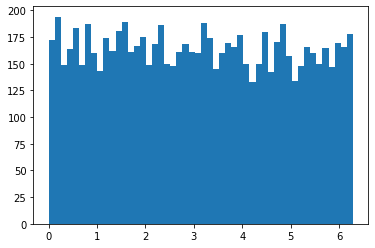

In [173]:
rv = wrapped_exponential(0.01)

points = rv.rvs(size = 2**13)
plt.hist(points, bins = 50);

In [163]:
ss.kstest(rv.rvs, ss.uniform(scale = 2.1).cdf, N = 2**15)

KstestResult(statistic=0.048034192512752094, pvalue=3.838097782567525e-66)

In [150]:
? ss.kstest